# Вариант 11
$e^x - x^3 + 3x^2 - 2x - 3 = 0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
np.set_printoptions(precision=3, suppress=True)

max_iterations = 100

## Метод простой итерации

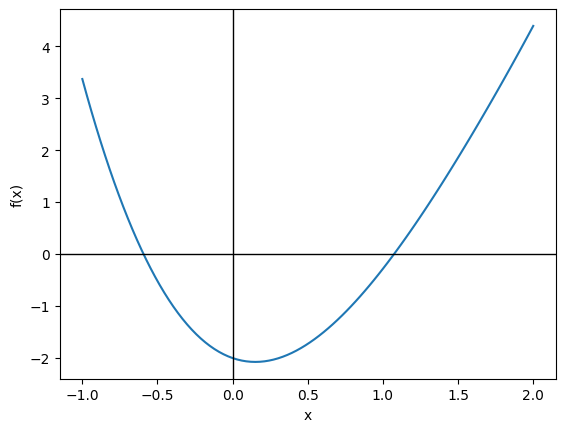

<Axes: xlabel='x', ylabel='f(x)'>

In [2]:
def plot_on_interval(f, l, r):
    X = np.linspace(l, r, 100)
    Y = np.array(list(map(f, X)))

    fig, ax = plt.subplots()

    plt.plot(X, Y)
    ax.axhline(0, color='black', lw=1)
    ax.axvline(0, color='black', lw=1)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()
    return ax

def f(x):
    return math.exp(x) - x ** 3 + 3 * x ** 2 - 2 * x - 3

plot_on_interval(f, -1, 2)

Как видно из построенного графика, уравнение имеет положительный корень на интервале $[0.5, 1.5]$

Для заданного уравнения выбрать эквивалентное уравнение $x = \varphi(x)$ можно разными способами. Рассмотрим вариант $\varphi(x) = \ln(x ^ 3 - 3x ^ 2 + 2x + 3)$, так как:

1. $\varphi(x) \in [0.5, 1.5], \forall x \in [0.5, 1.5]$
2. $\varphi'(x) = \frac{3x^2 - 6x + 2}{x^3 - 3x^2 + 2x + 3}, |\varphi'(x)| < 0.35 = q, \forall x \in [0.5, 1.5]$

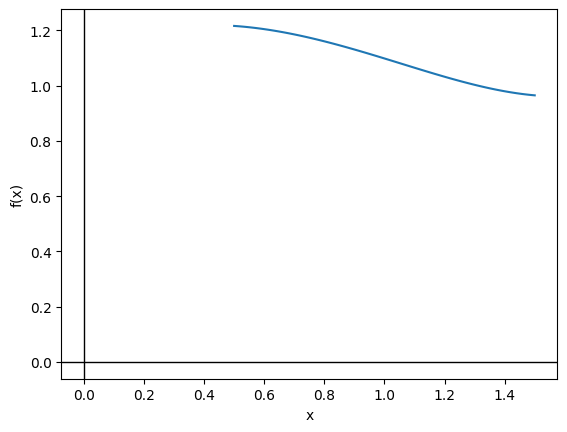

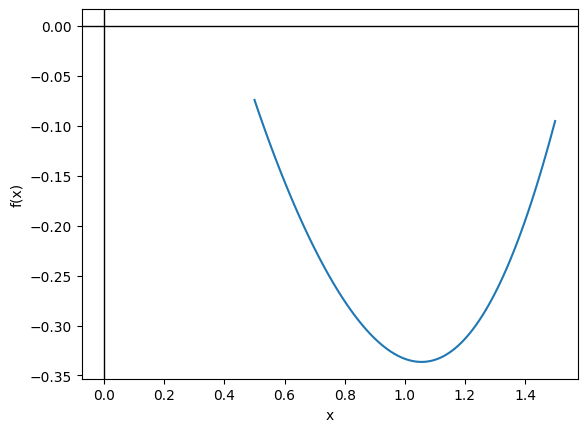

<Axes: xlabel='x', ylabel='f(x)'>

In [3]:
def phi(x):
    return math.log(x ** 3 - 3 * x ** 2 + 2 * x + 3)

def dphi_dx(x):
    return (3 * x ** 2 - 6 * x + 2) / (x ** 3 - 3 * x ** 2 + 2 * x + 3)

q = 0.35

plot_on_interval(phi, 0.5, 1.5)
plot_on_interval(dphi_dx, 0.5, 1.5)

In [4]:
def is_changing_sign(f, l, r):
    return f(l) * f(r) < 0

def simple_iteration_method(f, phi, l, r, presicion):
    if not is_changing_sign(f, l, r):
        raise Exception("Функция не меняет знак на заданном отрезке")
    
    iterations = 0
    x0 = (l + r) / 2

    while iterations < max_iterations:
        iterations += 1
        x = phi(x0)
        if q / (1 - q) * abs(x - x0) <= presicion:
            return x, iterations
        x0 = x
        
    raise Exception("Метод простых итераций не смог сойтись при заданной точности")

for i in range(2, 10):
    presicion = 10 ** (-i)
    x, iterations = simple_iteration_method(f, phi, 0.5, 1.5, presicion)
    print("точность = {0}, x = {1}, итерации = {2}".format(presicion, x, iterations))    

точность = 0.01, x = 1.0766262447236965, итерации = 3
точность = 0.001, x = 1.0741471291025935, итерации = 5
точность = 0.0001, x = 1.0738671012392975, итерации = 7
точность = 1e-05, x = 1.0738354671311936, итерации = 9
точность = 1e-06, x = 1.0738318934555533, итерации = 11
точность = 1e-07, x = 1.0738314210430795, итерации = 14
точность = 1e-08, x = 1.0738314363721397, итерации = 16
точность = 1e-09, x = 1.0738314381038518, итерации = 18


## Метод Ньютона
Для метода Ньютона понадобится считать значение производной функции: $f'(x) = e^x - 3x^2 + 6x - 2$.

Проверим условие сходимости метода Ньютона:

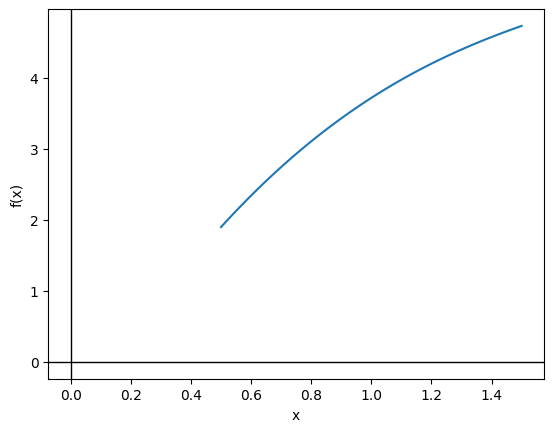

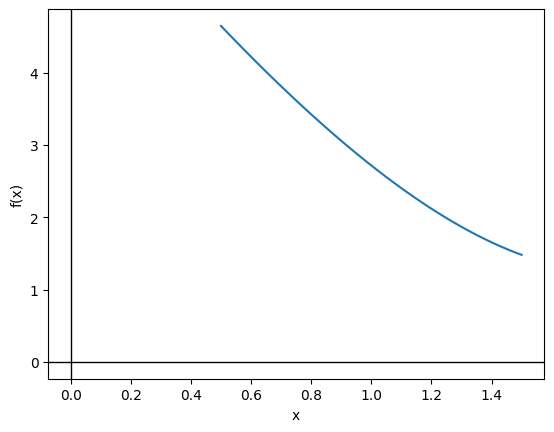

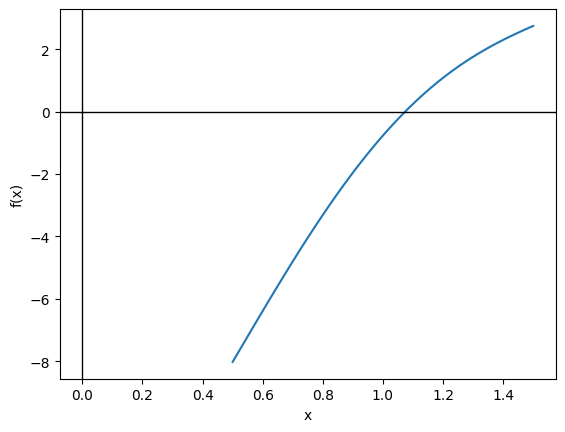

<Axes: xlabel='x', ylabel='f(x)'>

In [5]:
def df_dx(x):
    return math.exp(x) - 3 * x ** 2 + 6 * x - 2

def df2_dx2(x):
    return math.exp(x) - 6 * x + 6

def f_df2(x):
    return f(x) * df2_dx2(x)

def is_converging(x0):
    return f(x0) * df2_dx2(x0) > 0

plot_on_interval(df_dx, 0.5, 1.5)
plot_on_interval(df2_dx2, 0.5, 1.5)
plot_on_interval(f_df2, 0.5, 1.5)

In [6]:
def newton_method(f, df_dx, l, r, presicion):
    if not is_changing_sign(f, l, r):
        raise Exception("Функция не меняет знак на заданном отрезке")
    
    iterations = 0
    x0 = r
    if not is_converging(x0):
        raise Exception("Метод Ньютона не сходится из данной начальной точки")
    
    while iterations < max_iterations:
        iterations += 1
        x = x0 - f(x0) / df_dx(x0)
        if abs(x - x0) <= presicion:
            return x, iterations
        x0 = x
    
    raise Exception("Метод Ньютона не смог сойтись при заданной точности")

for i in range(2, 10):
    presicion = 10 ** (-i)
    x, iterations = newton_method(f, df_dx, 0.5, 1.5, presicion)
    print("точность = {0}, x = {1}, итерации = {2}".format(presicion, x, iterations))

точность = 0.01, x = 1.0738314761123138, итерации = 3
точность = 0.001, x = 1.0738314761123138, итерации = 3
точность = 0.0001, x = 1.0738314383243972, итерации = 4
точность = 1e-05, x = 1.0738314383243972, итерации = 4
точность = 1e-06, x = 1.0738314383243972, итерации = 4
точность = 1e-07, x = 1.0738314383243972, итерации = 4
точность = 1e-08, x = 1.0738314383243968, итерации = 5
точность = 1e-09, x = 1.0738314383243968, итерации = 5


# Системы нелинейных уравнений

$$
\begin{cases}
x_1 - cos(x_2) = 2 \\ 
x_2 - sin(x_1) = 2 
\end{cases}
$$

## Метод простых итераций

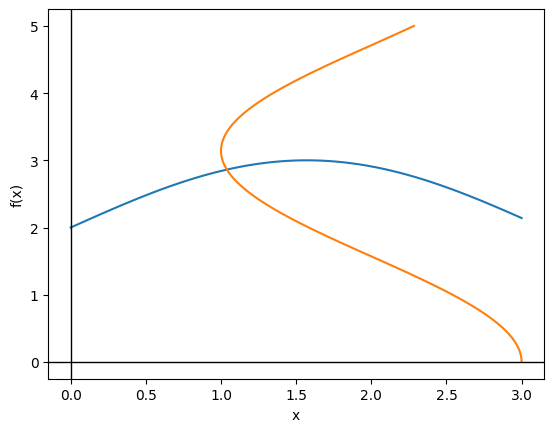

<Axes: xlabel='x', ylabel='f(x)'>

In [7]:
def plot_system_on_interval(f1, f2, l, r):
    X = np.linspace(l, r, 100)
    Y = np.linspace(0, 5, 100)
    Y1 = np.array(list(map(f2, X)))
    X2 = np.array(list(map(f1, Y)))

    fig, ax = plt.subplots()

    plt.plot(X, Y1)
    plt.plot(X2, Y)
    ax.axhline(0, color='black', lw=1)
    ax.axvline(0, color='black', lw=1)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()
    return ax

def f1(x1, x2):
    return x1 - math.cos(x2) - 2

def f2(x1, x2):
    return x2 - math.sin(x1) - 2

def phi1(x):
    return math.cos(x) + 2

def phi2(x):
    return math.sin(x) + 2

plot_system_on_interval(phi1, phi2, 0, 3)

In [8]:
def dphi1_dx1(x1, x2):
    return 0

def dphi1_dx2(x1, x2):
    return -math.sin(x2)

def dphi2_dx1(x1, x2):
    return math.cos(x1)

def dphi2_dx2(x1, x2):
    return 0

def is_converging(x1, x2):
    abs_phi1 = abs(dphi1_dx1(x1, x2)) + abs(dphi1_dx2(x1, x2))
    abs_phi2 = abs(dphi2_dx1(x1, x2)) + abs(dphi2_dx2(x1, x2))
    return max(abs_phi1, abs_phi2) < 1

def f(x1, x2):
    return phi1(x2), phi2(x1)

def system_simple_iteration_method(x1, x2, precision):
    if not is_converging(x1, x2):
        raise Exception("Метод простых итераций не сходится при данной начальной точке")
    
    iterations = 0
    while iterations < max_iterations:
        iterations += 1
        new_x1, new_x2 = f(x1, x2)
        if max(abs(x1 - new_x1), abs(x2 - new_x2)) <= precision:
            return x1, x2, iterations
        x1 = new_x1
        x2 = new_x2

    raise Exception("Метод простых итераций не сходится при заданной точности")     

for i in range(2, 10):
    presicion = 10 ** (-i)
    x1, x2, iterations = system_simple_iteration_method(0.5, 1.5, presicion)
    print("точность = {0}, x = ({1}, {2}), итерации = {3}".format(presicion, x1, x2, iterations))

точность = 0.01, x = (1.0394751198779717, 2.8526528801991864), итерации = 6
точность = 0.001, x = (1.0385183414080887, 2.8617930396340703), итерации = 9
точность = 0.0001, x = (1.038927821354709, 2.8618413874547093), итерации = 11
точность = 1e-05, x = (1.0388704446730623, 2.8618346161680672), итерации = 13
точность = 1e-06, x = (1.0388774602549402, 2.861835948566694), итерации = 16
точность = 1e-07, x = (1.0388774969249166, 2.861835377854735), итерации = 18
точность = 1e-08, x = (1.0388774897092454, 2.8618354476423233), итерации = 21
точность = 1e-09, x = (1.038877492799961, 2.8618354480070947), итерации = 23


## Метод Ньютона

In [9]:
def df1_dx1(x1, x2):
    return 1

def df1_dx2(x1, x2):
    return math.sin(x2)

def df2_dx1(x1, x2):
    return -math.cos(x1)

def df2_dx2(x1, x2):
    return 1

def det(A):
    return A[0, 0] * A[1, 1] - A[0, 1] * A[1, 0]

def J(x1, x2):
    return det(np.array([
        [df1_dx1(x1, x2), df1_dx2(x1, x2)],
        [df2_dx1(x1, x2), df2_dx2(x1, x2)]
    ]))

def A1(x1, x2):
    return det(np.array([
        [f1(x1, x2), df1_dx2(x1, x2)],
        [f2(x1, x2), df2_dx2(x1, x2)]
    ]))

def A2(x1, x2):
    return det(np.array([
        [df1_dx1(x1, x2), f1(x1, x2)],
        [df2_dx1(x1, x2), f2(x1, x2)]
    ]))

def system_newton_method(x1, x2, precision):
    if J(x1, x2) == 0:
        raise Exception("Метод Ньютона не сходится")
    
    iterations = 0
    while iterations < max_iterations:
        iterations += 1
        solution = np.array(
            [x1 - A1(x1, x2) / J(x1, x2),
             x2 - A2(x1, x2) / J(x1, x2)]
        )
        if max(abs(x1 - solution[0]), abs(x2 - solution[1])) <= precision:
            return solution[0], solution[1], iterations
        x1 = solution[0]
        x2 = solution[1]

    raise Exception("Метод Ньютона не сходится при заданной точности")    
        
for i in range(2, 10):
    presicion = 10 ** (-i)
    x1, x2, iterations = system_newton_method(0.5, 1.5, presicion)
    print("точность = {0}, x = ({1}, {2}), итерации = {3}".format(presicion, x1, x2, iterations))        

точность = 0.01, x = (1.0388774918236356, 2.8618354501132903), итерации = 4
точность = 0.001, x = (1.0388774918236356, 2.8618354501132903), итерации = 4
точность = 0.0001, x = (1.0388774918236356, 2.8618354501132903), итерации = 4
точность = 1e-05, x = (1.0388774924202904, 2.861835447962285), итерации = 5
точность = 1e-06, x = (1.0388774924202904, 2.861835447962285), итерации = 5
точность = 1e-07, x = (1.0388774924202904, 2.861835447962285), итерации = 5
точность = 1e-08, x = (1.0388774924202904, 2.861835447962285), итерации = 5
точность = 1e-09, x = (1.0388774924202904, 2.861835447962285), итерации = 6
